In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Open Data

In [122]:
dt = pd.read_csv("data/train.csv")
dt.shape

/Users/selbo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(637774, 9)

In [123]:
def rmspe(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

## Clean Data

In [106]:
# Clear Missing Values for the target variable
dt.loc[:, "Sales"].isnull().sum()

0

In [107]:
dt = dt.dropna( how='any', subset=['Sales'])
dt = dt.drop("Customers", axis=1)

In [108]:
dt.isnull().sum()

Date                   0
Store              18719
DayOfWeek          18465
Sales                  0
Open               18622
Promo              18694
StateHoliday       18680
SchoolHoliday      18764
number_missings        0
dtype: int64

In [109]:
#Baseline
dt.loc[:, "Sales"].mean()

5668.015833612122

## Exploratory Analysis

In [110]:
#where are the missing values?
dt.loc[:, "number_missings"] = dt.isnull().sum(axis=1)
dt.loc[:, "number_missings"].value_counts()

0    514818
1     96235
2      7381
3       305
4         8
Name: number_missings, dtype: int64

In [111]:
miss_more_than_1 = dt.loc[:, "number_missings"]>1
miss_any = dt.loc[:, "number_missings"]>0
dt_nomissing = dt.loc[~miss_any, :]
dt_fewmissing = dt.loc[~miss_more_than_1, :]

In [112]:
dt_nomissing.shape

(514818, 9)

In [113]:
dt_fewmissing.shape


(611053, 9)

In [114]:
dt.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'number_missings'],
      dtype='object')

In [115]:
dt.Promo.value_counts()

0.0    377870
1.0    222183
Name: Promo, dtype: int64

In [116]:
dt.DayOfWeek.value_counts()

2.0    86270
3.0    86266
4.0    86251
1.0    85441
7.0    85399
6.0    85363
5.0    85292
Name: DayOfWeek, dtype: int64

In [117]:
dt.Open.value_counts()

1.0    497541
0.0    102584
Name: Open, dtype: int64

In [118]:
dt.StateHoliday.value_counts()

0      519702
0.0     61649
a       12407
b        4215
c        2094
Name: StateHoliday, dtype: int64

In [119]:
dt.SchoolHoliday.value_counts()

0.0    496001
1.0    103982
Name: SchoolHoliday, dtype: int64

In [120]:
dt.Store.value_counts()

246.0    557
802.0    557
48.0     557
945.0    557
319.0    556
        ... 
859.0    502
145.0    501
430.0    501
694.0    500
915.0    499
Name: Store, Length: 1115, dtype: int64

<AxesSubplot:>

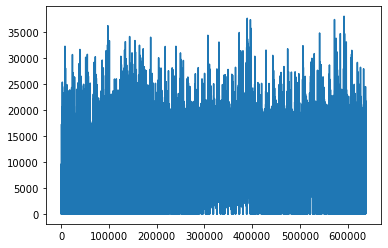

In [63]:
dt_nomissing.Sales.plot()

## Feature Engineering

In [ ]:
#make one-hot-encoding for the StateHoliday variable
#a = public holiday, b = Easter holiday, c = Christmas, 0 = None

In [ ]:
#StoreType
#try either target encoding or one-hot encoding

In [ ]:
#Assortment
#could be ordinal encoding

In [ ]:
#CompetitionDistance could be metric or maybe squared?


In [ ]:
#Promo2 how is this working?

In [ ]:
#CompetitionOpenSince[Month/Year]
#should be interacted with competitionDistance


In [54]:
dt.columns

Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'number_missings'],
      dtype='object')

## Final Feature selection

In [59]:
X = dt_nomissing.loc[:,  ['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']]
y = dt_nomissing.loc[:, 'Sales']

## Split Data in Test/Train

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)

## Modelling

### Baseline

In [154]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'c'

In [129]:
pred_naive

5670.4308358466715